### Download the dataset
- use **torchvision.dataset** to download the MNIST digits dataset. Make sure the downladed tensors are tansormed to Tensors.
- generate train and test loaders of batch size 64 and assign it to variables **trainloader** and **testloader** respectively.

#### Expected output:
    dimension of first batch of trainloader: torch.Size([64, 1, 28, 28])

In [1]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch import optim
import helper

# Download and load the training data
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

image, labels = next(iter(trainloader))
print("dimension of first batch of trainloader:", image.shape)

dimension of first batch of trainloader: torch.Size([64, 1, 28, 28])


- define the method named model_buid() to build a sequential model.
  - parameters: 
       - **input_size** int: number of input features  
       - **hidden_sizes** array of size 3: array of number of nodes in each of the three hidden layers  
       - **output int**: number of nodes at output layer (or number of classes to classify)  
  - returns model: sequential model  
Apply relu activation between each layer and for the **final layer out apply logSoftmax.**  
Logsoftmax log transformation of softmax output which is given by :$$
 \sigma(x_i) =  \log \cfrac{e^{x_i}}{\sum_{k=1}^{N}{e^{x_k}}}$$ where N is the number of classes  
 more information [here](https://pytorch.org/docs/stable/nn.html#torch.nn.LogSoftmax) 
  - using the function we defined, ** we initialize the model to have input size 784, three hidden layers to have 256, 128 and 64 nodes and finally an output layer of size 10 nodes.**
  
#### Expected output:  
Sequential(  
  (0): Linear(in_features=784, out_features=256, bias=True)  
  (1): ReLU()  
  (2): Linear(in_features=256, out_features=128, bias=True)  
  (3): ReLU()  
  (4): Linear(in_features=128, out_features=64, bias=True)  
  (5): ReLU()  
  (6): Linear(in_features=64, out_features=10, bias=True)  
  (7): LogSoftmax()  
)  


In [2]:
torch.manual_seed(999)
input_size = 784
hidden_sizes = [256,128, 64]
output_size = 10

# Build a feed-forward network
def build_model(input_size, hidden_sizes, output_size):
    ####Start code here
    model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),  
                   nn.ReLU(),
                   nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                   nn.ReLU(),
                   nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                   nn.ReLU(),
                   nn.Linear(hidden_sizes[2], output_size),
                   nn.LogSoftmax(dim=1))
    #### End code
    return model

classifier = build_model(input_size,hidden_sizes,output_size)
print(classifier)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax()
)


### Perform forward pass on single image
- get the images and labels from first batch of trainloader
- sample the first image from the batch and flatten the image tensor from (1 x 28 x 28) to (1, 784)
- using the model we defined in the previous cell perfrom a forward pass on the flattened image and save the network output to variable **log_ps**
- transform log transformed softmax output log_ps to exponential and assign it to ps (torch.exp())
- return the top probability and its index from  **ps** (ps.topk())  
Since the model is not trained yet, the output class probabilities are uniform.


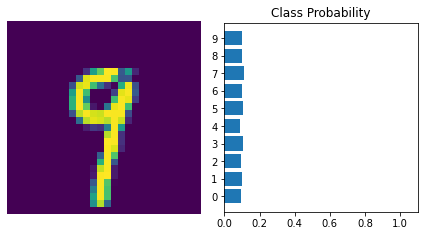

In [3]:
torch.manual_seed(999)
dataiter = iter(trainloader)
images, labels = dataiter.next() 
image =  images[0] ###sample first image from images
image = image.view(image.shape[0], -1)
with torch.no_grad():
    log_ps = classifier(image)
ps = torch.exp(log_ps)
top_p, top_class = ps.topk(1, dim=1)

helper.view_classify(image.view(1,28,28), ps)
prob = top_p.item()

### Define criterion (loss function) and optimizer
  - Define criterion to be [negative likelihood loss](https://pytorch.org/docs/stable/nn.html#torch.nn.NLLLoss) since the network output is log transformed probabilities.
  - Define optimizer to be [Adam](https://pytorch.org/docs/stable/optim.html#torch.optim.Adam) and set learning rate to 0.003 and pass the parameters of **classifier** model 

In [4]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(classifier.parameters(),lr=0.003)


### Train the classifier

Epoch: 1/5..  Training Loss: 0.249..  Test Loss: 0.093..  Test Accuracy: 0.972
Epoch: 2/5..  Training Loss: 0.106..  Test Loss: 0.070..  Test Accuracy: 0.978
Epoch: 3/5..  Training Loss: 0.079..  Test Loss: 0.053..  Test Accuracy: 0.984
Epoch: 4/5..  Training Loss: 0.063..  Test Loss: 0.053..  Test Accuracy: 0.984
Epoch: 5/5..  Training Loss: 0.054..  Test Loss: 0.036..  Test Accuracy: 0.989
After training


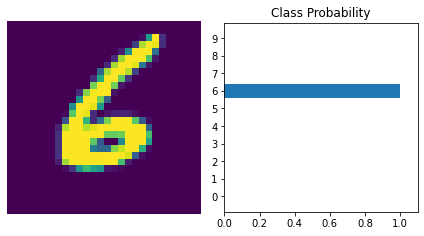

In [5]:
torch.manual_seed(999)

epochs = 5
steps = 0

for e in range(epochs):
    
    # Initializing loss
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)         # flatten the images
        optimizer.zero_grad()   
        log_ps = classifier(images)                       # perform forward pass
        loss = criterion(log_ps,labels)                   # compute loss using the criterion by passing log_ps and labels
        loss.backward()                                   # call .backward() on loss
        optimizer.step()                                  # update parameters using .step() on optimizer
        
        running_loss += loss.item()
        
    # Compute loss on test set for each batch of training     
    else:
        # Initializing train loss and test loss
        test_loss = 0
        accuracy = 0
        
        
        with torch.no_grad():
            for images, labels in testloader:
            
                images =  images = images.view(images.shape[0], -1)           # flatten images
                log_ps =   classifier(images)                                 # perform forward pass
                test_loss += criterion(log_ps,labels)                         # update the test loss    
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)                          # get the top class for each sample
                
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

print("After training")
helper.view_classify(images[0].view(1,28,28), ps[0])
with open("output.txt", "w") as file:
    file.write("{:.2f}".format(prob)+"\n")
    file.write(("{:.2f}".format(running_loss)))